#### **<span style="color:pink">Support Vector Machine, SVM</span>**

- Regressotion, Classification, Anomaly Detection 등에 사용되는 Superviesd Learning
- 클래스 사이의 경계에 위치한 데이터 포인트를 Support Vector라고 함
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
- 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
- 서포트 벡터 까지의 거리와 서포트 벡터의 중요도를 기반으로 예측 수행

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)
print(boston_df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


##### SVM을 이용한 회귀 모델과 분류 모델

##### <span style="color:pink">SVM 을 사용한 회귀 모델 (SVR)</span>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('medv',axis=1), boston_df['medv'], random_state=42)

model = SVR()
model.fit(X_train, y_train)

print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.17813783698679442
Scores of Test Data : 0.2962129740673507


##### <span style="color:pink">SVM 을 사용한 분류 모델 (SVC)</span>

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVC()
model.fit(X_train, y_train)

print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.9107981220657277
Scores of Test Data : 0.951048951048951


##### 커널 기법

- 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
- scikit-learn에서는 Linear, PolyNomial, RBF(Radial Basis Function) 등 다양한 커널 기법을 지원

In [7]:
########## Linear SVR 

X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('medv',axis=1), boston_df['medv'], random_state=42)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print(f'Linear SVR Scores of Training Data : {linear_svr.score(X_train, y_train)}')
print(f'Linear SVR Scores of Test Data : {linear_svr.score(X_test, y_test)}')

########## Polynomial SVR

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print(f'Polynomial SVR Scores of Training Data : {polynomial_svr.score(X_train, y_train)}')
print(f'Polynomial SVR Scores of Test Data : {polynomial_svr.score(X_test, y_test)}')

########## RBF SVR

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print(f'RBF SVR Scores of Training Data : {rbf_svr.score(X_train, y_train)}')
print(f'RBF SVR Scores of Test Data : {rbf_svr.score(X_test, y_test)}')

Linear SVR Scores of Training Data : 0.711333407606611
Linear SVR Scores of Test Data : 0.6020584261174697
Polynomial SVR Scores of Training Data : 0.1810210386830461
Polynomial SVR Scores of Test Data : 0.27921425986164905
RBF SVR Scores of Training Data : 0.17813783698679442
RBF SVR Scores of Test Data : 0.2962129740673507


##### SVC

In [8]:
########## Linear SVR 

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print(f'Linear SVC Scores of Training Data : {linear_svc.score(X_train, y_train)}')
print(f'Linear SVC Scores of Test Data : {linear_svc.score(X_test, y_test)}')

########## Polynomial SVR

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print(f'Polynomial SVC Scores of Training Data : {polynomial_svc.score(X_train, y_train)}')
print(f'Polynomial SVC Scores of Test Data : {polynomial_svc.score(X_test, y_test)}')

########## RBF SVR

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print(f'RBF SVC Scores of Training Data : {rbf_svc.score(X_train, y_train)}')
print(f'RBF SVC Scores of Test Data : {rbf_svc.score(X_test, y_test)}')

Linear SVC Scores of Training Data : 0.9694835680751174
Linear SVC Scores of Test Data : 0.958041958041958
Polynomial SVC Scores of Training Data : 0.8990610328638498
Polynomial SVC Scores of Test Data : 0.9440559440559441
RBF SVC Scores of Training Data : 0.9107981220657277
RBF SVC Scores of Test Data : 0.951048951048951


##### 매개변수 튜닝

- SVM 은 사용하는 커널에 따라 다양한 매개변수 설정이 가능하다

In [9]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print(f'Kernel=poly, degree : {2} | C : {0.1} | gamma : {"auto"}')
print(f'Polynomial SVC Scores of Training Data : {polynomial_svc.score(X_train, y_train)}')
print(f'Polynomial SVC Scores of Test Data : {polynomial_svc.score(X_test, y_test)}')

Kernel=poly, degree : 2 | C : 0.1 | gamma : auto
Polynomial SVC Scores of Training Data : 0.9765258215962441
Polynomial SVC Scores of Test Data : 0.958041958041958


##### Data Preprocessing

- SVM은 입력 데이터가 **<span style="color:pink">정규화 되어야 좋은 성능을 보임</span>**
- 주로 모든 특성값을 [0,1] 범위로 맞추는 방법을 사용함 **<span style="color:pink">(MinMaxScale)</span>**

In [21]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
model = SVC()
model.fit(X_train, y_train)

print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.9107981220657277
Scores of Test Data : 0.951048951048951


In [30]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train_scale, y_train)

print(f'Scores of STD - Scaling Training Data : {model.score(X_train_scale, y_train)}')
print(f'Scores of STD - Scaling Test Data : {model.score(X_test_scale, y_test)}')

Scores of STD - Scaling Training Data : 0.9882629107981221
Scores of STD - Scaling Test Data : 0.972027972027972


In [31]:
scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train_scale, y_train)

print(f'Scores of MinMaxScaling Training Data : {model.score(X_train_scale, y_train)}')
print(f'Scores of MinMaxScaling Test Data : {model.score(X_test_scale, y_test)}')

Scores of MinMaxScaling Training Data : 0.9835680751173709
Scores of MinMaxScaling Test Data : 0.9790209790209791


##### Linear SVR

In [34]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('medv',axis=1), boston_df['medv'], random_state=42, test_size=0.2)

In [35]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [36]:
model = SVR(kernel='linear')
model.fit(X_train_scale, y_train)

SVR(kernel='linear')

In [37]:
print(f'Scores of Training Data : {model.score(X_train_scale, y_train)}')
print(f'Scores of Test Data : {model.score(X_test_scale, y_test)}')

Scores of Training Data : 0.7164067174178399
Scores of Test Data : 0.6056589279132616


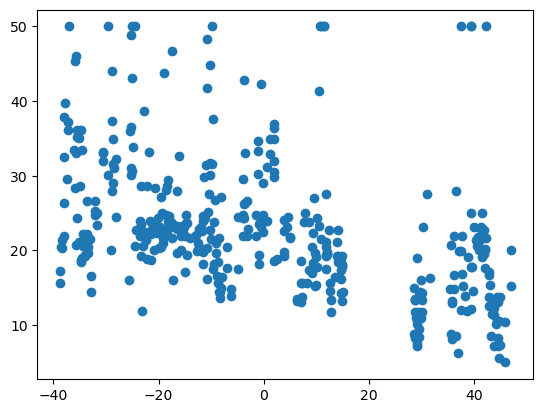

In [45]:
X_comp = TSNE(n_components=1).fit_transform(X_train)
plt.scatter(X_comp, y_train);

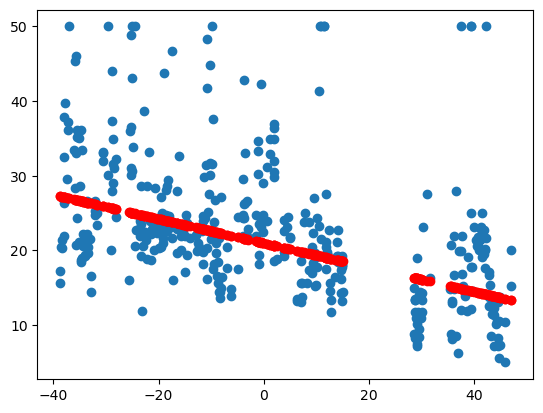

In [47]:
model.fit(X_comp, y_train)
predict = model.predict(X_comp)
plt.scatter(X_comp, y_train)
plt.scatter(X_comp, predict, color='r')

In [50]:
estimator = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)

cross_validate(
    estimator=estimator,
    X=X_train, y=y_train,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00971746, 0.00750804, 0.00600362, 0.00921082, 0.00599909]),
 'score_time': array([0.00248647, 0.00100279, 0.00220942, 0.00249314, 0.00220442]),
 'test_score': array([0.76532254, 0.59098325, 0.67639136, 0.78261305, 0.65968873])}

In [51]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

In [53]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=12,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [54]:
print(f'Best estimator : {gs.best_estimator_}')
print(f'Best parameters : {gs.best_params_}')
print(f'Best score : {gs.best_score_}')

Best estimator : Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])
Best parameters : {'model__C': 1.0, 'model__epsilon': 0.1, 'model__gamma': 'scale'}
Best score : 0.7013121058662775
